In [2]:
from matplotlib import pyplot as plt
import numpy as np
import cv2

In [26]:
N = 70
P = 70

ori_img = cv2.imread('./maudy.png', 0)
img = cv2.resize(img, (N,N))
imvec = np.reshape(np.array(img), (N*N,1))

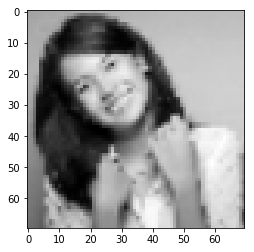

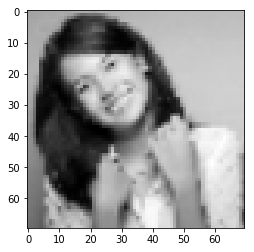

In [27]:
def imshow(imgdata):
    plt.imshow(imgdata, cmap = 'gray')
    plt.show()
    
imshow(img)
imshow(img)

![](assets/formula.jpeg)

In [28]:
# GENERATE MATRIX TRANSFORM

matN = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
matM = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
for i in range(-P, P+1):
    matN[i,:] = i
    matM[:,i] = i
matN = matN.reshape(((2 * P + 1) * (2 * P + 1), 1))
matN = np.repeat(matN, N * N, axis=1)
matM = matM.reshape(((2 * P + 1) * (2 * P + 1), 1))
matM = np.repeat(matM, N * N, axis=1)

matI = np.ones((N,N), dtype='float32')
matK = np.ones((N,N), dtype='float32')
for i in range(N):
    matI[i,:] = i
    matK[:,i] = i
matI = matI.reshape((1, N * N))
matI = np.repeat(matI, (2 * P + 1) * (2 * P + 1), axis=0)
matK = matK.reshape((1, N * N))
matK = np.repeat(matK, (2 * P + 1) * (2 * P + 1), axis=0)

matY = (2 * matI - 1 - N) / N / np.sqrt(2)
matX = (2 * matK - 1 - N) / N / np.sqrt(2)
matR = np.sqrt(matX * matX + matY * matY)
matT = np.arctan2(matY, matX)

# FREE UP SOME MEMORY - 1
del matI
del matK
del matY
del matX

matW = 2 / (np.pi * N * N) * np.exp(-2 * np.pi * matN * matR * matR * 1j - matM * matT * 1j)

# FREE UP SOME MEMORY - 2
del matN
del matM
del matR
del matT

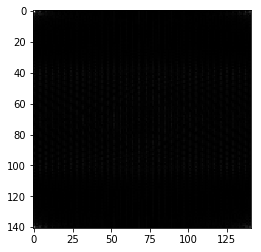

In [29]:
transformed = np.matmul(matW, imvec)
transformed_abs = np.abs(transformed)
transformed_abs_img = np.reshape(transformed_abs, (2 * P + 1, 2 * P + 1))
imshow(transformed_abs_img)

In [30]:
# GENERATE MATRIX INVERS TRANSFORM

matN = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
matM = np.ones((2 * P + 1, 2 * P + 1), dtype='float32')
for i in range(-P, P+1):
    matN[i,:] = i
    matM[:,i] = i
matN = matN.reshape((1, (2 * P + 1) * (2 * P + 1)))
matN = np.repeat(matN, N * N, axis=0)
matM = matM.reshape((1, (2 * P + 1) * (2 * P + 1)))
matM = np.repeat(matM, N * N, axis=0)

matI = np.ones((N,N), dtype='float32')
matK = np.ones((N,N), dtype='float32')
for i in range(N):
    matI[i,:] = i
    matK[:,i] = i
matI = matI.reshape((N*N,1))
matI = np.repeat(matI, (2 * P + 1)*(2 * P + 1), axis=1)
matK = matK.reshape((N*N,1))
matK = np.repeat(matK, (2 * P + 1)*(2 * P + 1), axis=1)

matY = (2 * matI - 1 - N) / N / np.sqrt(2)
matX = (2 * matK - 1 - N) / N / np.sqrt(2)
matR = np.sqrt(matX * matX + matY * matY)
matT = np.arctan2(matY, matX)

# FREE UP SOME MEMORY - 1
del matI
del matK
del matY
del matX

matV = np.exp(2 * np.pi * matN * matR * matR * 1j + matM * matT * 1j)

# FREE UP SOME MEMORY - 2
del matN
del matM
del matR
del matT

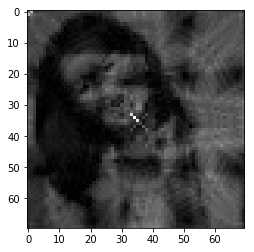

In [31]:
inversed = np.matmul(matV, transformed)
inversed_abs = np.abs(inversed)
inversed_abs_img = np.reshape(inversed_abs, (N,N))
imshow(inversed_abs_img)

In [32]:
matVW = np.matmul(matV, matW)
matVW = np.abs(matVW)
# matVW = np.floor(matVW)
print(np.sum(matVW))
print(matVW)

44110.03
[[2.58298683e+00 1.53772160e-02 8.21381714e-03 ... 1.34415895e-04
  1.23860838e-04 1.33456502e-04]
 [1.53771937e-02 2.58298659e+00 4.69090194e-02 ... 1.07887347e-04
  3.36016936e-04 1.16581476e-04]
 [8.21380131e-03 4.69090007e-02 2.58298659e+00 ... 3.71594564e-04
  2.05073622e-04 6.07353286e-05]
 ...
 [1.34414353e-04 1.07889347e-04 3.71595903e-04 ... 2.58298659e+00
  1.51847169e-01 4.20151651e-02]
 [1.23860256e-04 3.36015655e-04 2.05073971e-04 ... 1.51847199e-01
  2.58298659e+00 1.05242133e-01]
 [1.33455600e-04 1.16580035e-04 6.07352704e-05 ... 4.20151651e-02
  1.05242155e-01 2.58298659e+00]]


In [64]:
sum = 0
for i in range(2500):
    sum += matVW[i,i]
sum

2531.3296843767166

In [63]:
matVW[0,0]

1.0125319

In [13]:
import gc 
gc.collect()

0

In [18]:
del matV
del matW